In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Data polinom gibiyse kullanılır ama burada overfitting riski artabilir

In [49]:
#Datada doğrusal bir ilişki yoksa burada polinom regresyon çalışır ama burada derece arttığından dolayı overfitting riski artabilir

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [51]:
df = pd.read_csv("3-customersatisfaction.csv")

In [52]:
df.head() #memnuniyet ve geri bildirim oranı var

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [53]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [54]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


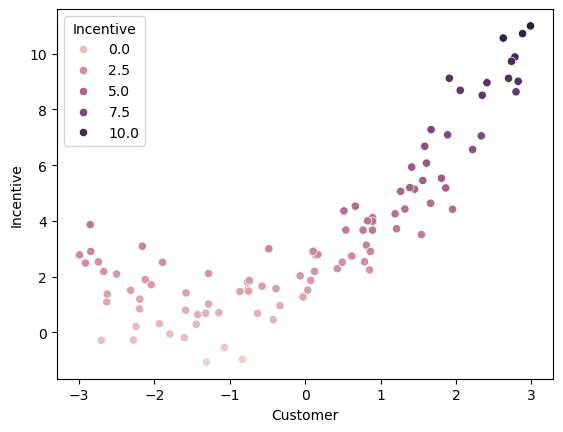

In [56]:
sns.scatterplot(x="Customer Satisfaction", y="Incentive", data=df, hue="Incentive")
plt.xlabel("Customer")
plt.show()


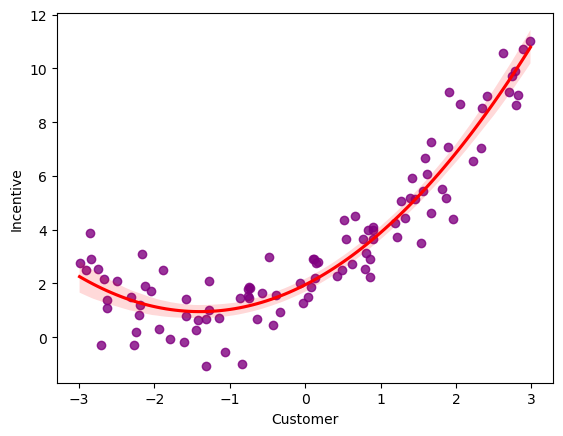

In [57]:
sns.regplot(
    x="Customer Satisfaction",
    y="Incentive",
    data=df,
    order=2,              # 2. dereceden polinom
    scatter_kws={"color": "purple"}, 
    line_kws={"color": "red"}
)
plt.xlabel("Customer")
plt.show()


In [58]:
#Dependent Independent features

In [59]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [60]:
X.head()

,Customer Satisfaction
0,-1.282447
1,0.425298
2,1.953070
3,2.625838
4,-1.426333


In [61]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [62]:
#Train test split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [64]:
X_train

,Customer Satisfaction
99,0.512504
3,2.625838
20,-0.865714
55,-1.145369
6,2.823460
...,...
28,1.191020
0,-1.282447
5,-1.311432
12,0.490521


In [65]:
regression = LinearRegression()

In [66]:
#Scaler

In [67]:
scaler = StandardScaler()

In [68]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
#Prediction

In [89]:
y_pred = regression.predict(X_test)

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

In [ ]:
y_pred

In [90]:
score = r2_score(y_test,y_pred)

In [91]:
print(score) #Çok düşük çıktı

0.7685687698788557


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

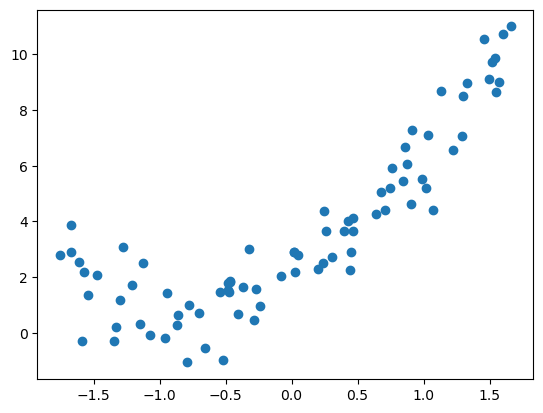

In [92]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")

In [93]:
#Model uymadı çünkü data linear değil

In [94]:
poly=PolynomialFeatures(degree=2,include_bias=True)

In [95]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [96]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [97]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)


LinearRegression()

In [98]:
y_pred = regression.predict(X_test_poly)
r2_score(y_test,y_pred)
print(score)

0.7685687698788557


In [99]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [100]:
regression.intercept_

np.float64(2.076676429793282)

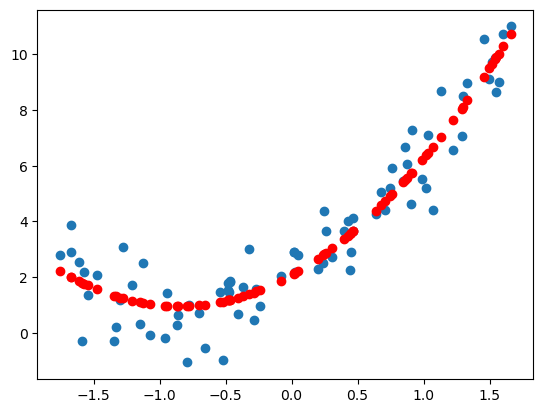

In [102]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly),color="r")